### Trabajo presentado por:

Santiago Echavarría Puerta - Johan Alejandro Holguín Arango

## TAREA

Para esta tarea tomamos un total de 9 fotos de placas de automóviles, dichas fotos se tomaron con exactamente la configuración, así:

- Dispositivo: iPhone 7 Plus
- Valor de apertura: 1.696
- Tiempo de exposición: 1/242
- Longitud focal: 2.99 mm
- Velocidad ISO: 20
- Número f: f/1,8
- Distancia del objetivo: 80 cm

Además, el montaje consistió en cámara en mano y luz natural de medio día. Las fotos fueron tomadas en el campus El Volador de la Universidad Nacional con previa autorización de sus propietarios.

### Procesamiento

Para comenzar, importamos las librerías con las que vamos a trabajar

In [6]:
%matplotlib inline 
#Magic para mostrar imágenes en Jupyter usando matplotlib

import numpy as np
import cv2
import matplotlib.pyplot as plt

Ahora importamos las fotos previamente tomadas y organizadas. Nótese que las imágenes se leen en escala de grises para facilitar su procesamiento.

In [7]:
I1 = cv2.imread("fotos/1.jpeg", cv2.IMREAD_GRAYSCALE)
I2 = cv2.imread("fotos/2.jpeg", cv2.IMREAD_GRAYSCALE)
I3 = cv2.imread("fotos/3.jpeg", cv2.IMREAD_GRAYSCALE)
I4 = cv2.imread("fotos/4.jpeg", cv2.IMREAD_GRAYSCALE)
I5 = cv2.imread("fotos/5.jpeg", cv2.IMREAD_GRAYSCALE)
I6 = cv2.imread("fotos/6.jpeg", cv2.IMREAD_GRAYSCALE)
I7 = cv2.imread("fotos/7.jpeg", cv2.IMREAD_GRAYSCALE)
I8 = cv2.imread("fotos/8.jpeg", cv2.IMREAD_GRAYSCALE)
I9 = cv2.imread("fotos/9.jpeg", cv2.IMREAD_GRAYSCALE)

A continuación, revisamos los histogramas de las imágenes para encontrar alguna coincidencia que pueda ser usada luego en el procesamiento

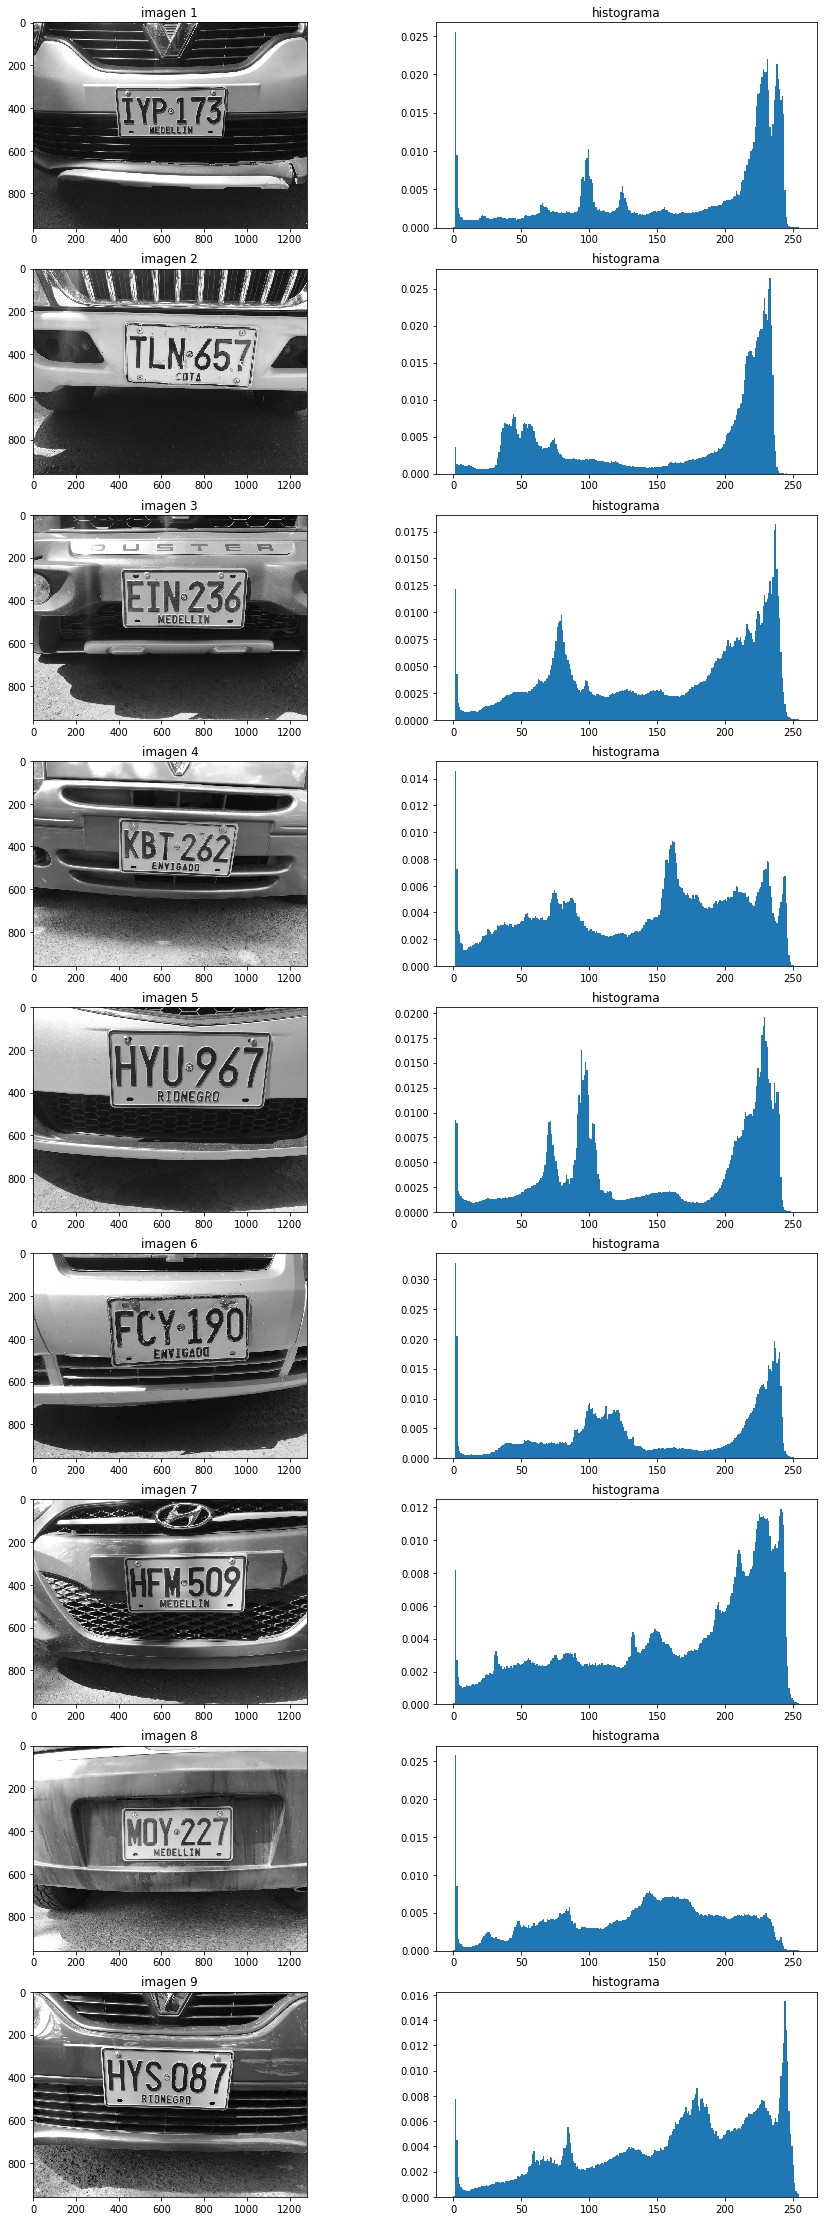

In [8]:
I1_array=I1.ravel()
fig, arreglo_plots = plt.subplots(9,2, figsize=(15, 40))
arreglo_plots[0,0].set_title('imagen 1')
arreglo_plots[0,0].imshow(I1, cmap="gray")
arreglo_plots[0,1].set_title('histograma')
_ = arreglo_plots[0,1].hist(I1_array*255, bins=255, range=(0.0, 255.0), normed=True)

I2_array=I2.ravel()
arreglo_plots[1,0].set_title('imagen 2')
arreglo_plots[1,0].imshow(I2, cmap="gray")
arreglo_plots[1,1].set_title('histograma')
_ = arreglo_plots[1,1].hist(I2_array*255, bins=255, range=(0.0, 255.0), normed=True)

I3_array=I3.ravel()
arreglo_plots[2,0].set_title('imagen 3')
arreglo_plots[2,0].imshow(I3, cmap="gray")
arreglo_plots[2,1].set_title('histograma')
_ = arreglo_plots[2,1].hist(I3_array*255, bins=255, range=(0.0, 255.0), normed=True)

I4_array=I4.ravel()
arreglo_plots[3,0].set_title('imagen 4')
arreglo_plots[3,0].imshow(I4, cmap="gray")
arreglo_plots[3,1].set_title('histograma')
_ = arreglo_plots[3,1].hist(I4_array*255, bins=255, range=(0.0, 255.0), normed=True)

I5_array=I5.ravel()
arreglo_plots[4,0].set_title('imagen 5')
arreglo_plots[4,0].imshow(I5, cmap="gray")
arreglo_plots[4,1].set_title('histograma')
_ = arreglo_plots[4,1].hist(I5_array*255, bins=255, range=(0.0, 255.0), normed=True)

I6_array=I6.ravel()
arreglo_plots[5,0].set_title('imagen 6')
arreglo_plots[5,0].imshow(I6, cmap="gray")
arreglo_plots[5,1].set_title('histograma')
_ = arreglo_plots[5,1].hist(I6_array*255, bins=255, range=(0.0, 255.0), normed=True)

I7_array=I7.ravel()
arreglo_plots[6,0].set_title('imagen 7')
arreglo_plots[6,0].imshow(I7, cmap="gray")
arreglo_plots[6,1].set_title('histograma')
_ = arreglo_plots[6,1].hist(I7_array*255, bins=255, range=(0.0, 255.0), normed=True)

I8_array=I8.ravel()
arreglo_plots[7,0].set_title('imagen 8')
arreglo_plots[7,0].imshow(I8, cmap="gray")
arreglo_plots[7,1].set_title('histograma')
_ = arreglo_plots[7,1].hist(I8_array*255, bins=255, range=(0.0, 255.0), normed=True)

I9_array=I9.ravel()
arreglo_plots[8,0].set_title('imagen 9')
arreglo_plots[8,0].imshow(I9, cmap="gray")
arreglo_plots[8,1].set_title('histograma')
_ = arreglo_plots[8,1].hist(I9_array*255, bins=255, range=(0.0, 255.0), normed=True)

### Thresholding

Basados en la información entregada por los histogramas, una buena idea sería obtener un umbral que separe simplemente los colores negros que son los que se encuentran en las letras y números de las placas. En este caso, se está escogiendo un valor umbral, y cada pixel de la imagen que sobrepase dicho umbral se cambia a blanco, mientras que cada pixel por debajo de este pasa a ser negro.

A continuación se define la función de thresholding:

In [9]:
def thresholding(im, th):
    for i in range(len(im)):
        for j in range(len(im[i])):
            if im[i][j] > th:
                im[i][j] = 255
            else:
                im[i][j] = 0
    return im;

A continuación mostramos el resultado de todas las imágenes usando la función de thresholding previamente explicada

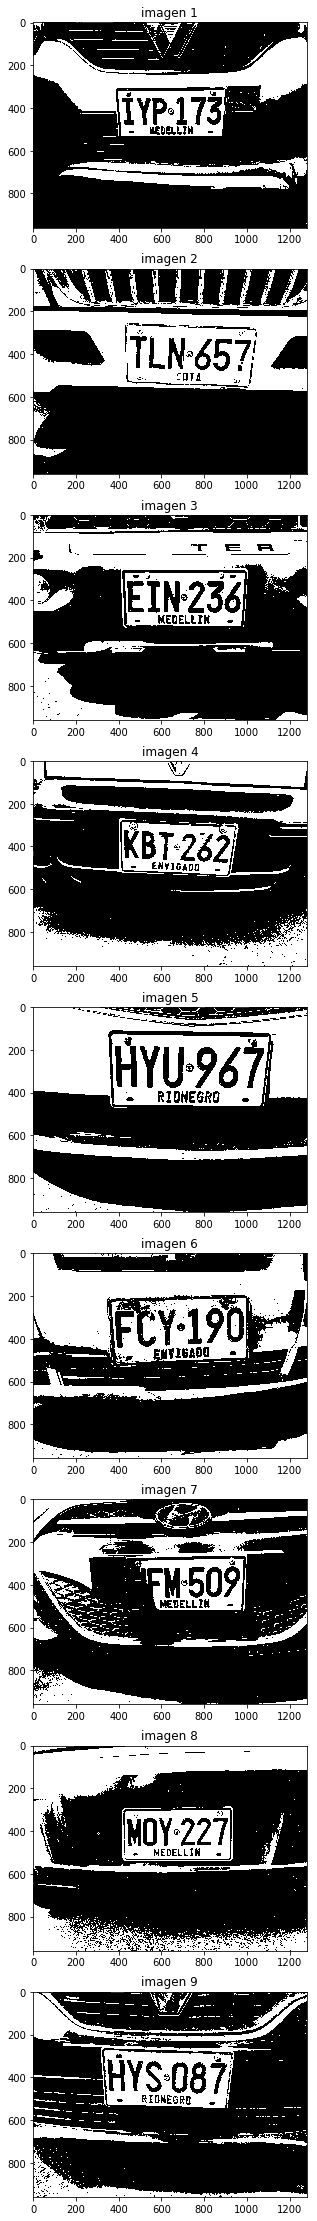

In [16]:
fig, arreglo_plots = plt.subplots(9,1, figsize=(15, 40))

arreglo_plots[0].set_title('imagen 1')
arreglo_plots[0].imshow(I1, cmap="gray")

arreglo_plots[1].set_title('imagen 2')
arreglo_plots[1].imshow(I2, cmap="gray")

arreglo_plots[2].set_title('imagen 3')
arreglo_plots[2].imshow(I3, cmap="gray")

arreglo_plots[3].set_title('imagen 4')
arreglo_plots[3].imshow(I4, cmap="gray")

arreglo_plots[4].set_title('imagen 5')
arreglo_plots[4].imshow(I5, cmap="gray")

arreglo_plots[5].set_title('imagen 6')
arreglo_plots[5].imshow(I6, cmap="gray")

arreglo_plots[6].set_title('imagen 7')
arreglo_plots[6].imshow(I7, cmap="gray")

arreglo_plots[7].set_title('imagen 8')
arreglo_plots[7].imshow(I8, cmap="gray")

arreglo_plots[8].set_title('imagen 9')
arreglo_plots[8].imshow(I9, cmap="gray")



### Otros métodos de procesamiento

Como trabajo futuro planteamos el uso de segmentación y detección de bordes, procesos que nos ayudarían a reconocer la placa en su totalidad. Como otros métodos de procesamiento incluímos la segmentación usando la mediana junto a un threshold, y el método de detección de bordes de Sobel. Estos aún no han sido implementados en Python, a continuación se muestra el resultado de una implementación previa realizada en Java:

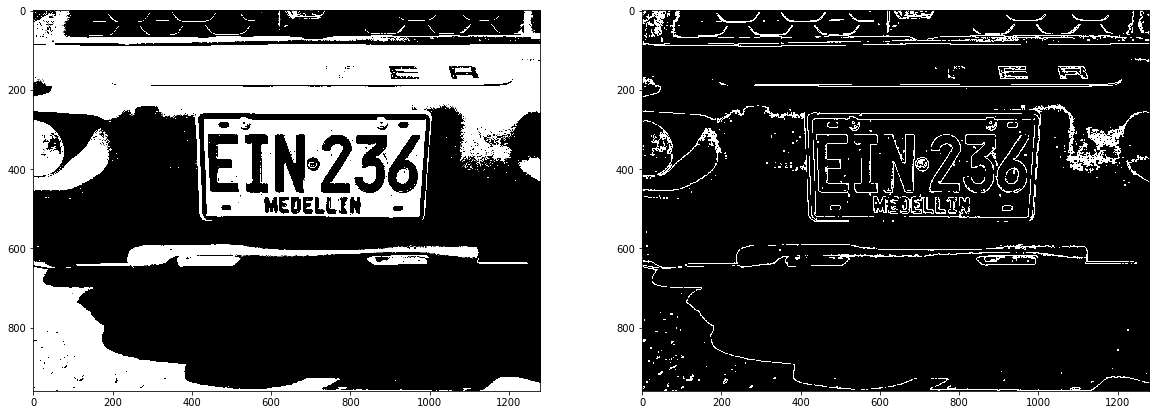

In [17]:
import cv2
import matplotlib.pyplot as plt
mediana = cv2.imread("fotos/java2.png")
sobel = cv2.imread("fotos/java3.png")
fig, (im1, im2) = plt.subplots(1,2, figsize=(20, 7))
im1.imshow(mediana)
im2.imshow(sobel)